#### Contagem de valores com pandas.Series.value_counts()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#cria uma serie com caracteres aleatorias
s=pd.Series(list('kajwbdajhdshbfaskyefgas'))

#apaga caracteres unicos
print(s.unique())

#contagem de valores
serie=s.value_counts()
print(serie)

#indice por nome
print(serie.loc['f'])
#indice por posiçao
print(serie.iloc[0])

print(serie.index)
print(serie.values)

['k' 'a' 'j' 'w' 'b' 'd' 'h' 's' 'f' 'y' 'e' 'g']
a    4
s    3
k    2
j    2
b    2
d    2
h    2
f    2
w    1
y    1
e    1
g    1
dtype: int64
2
4
Index(['a', 's', 'k', 'j', 'b', 'd', 'h', 'f', 'w', 'y', 'e', 'g'], dtype='object')
[4 3 2 2 2 2 2 2 1 1 1 1]


In [3]:
df=pd.read_csv('https://softgraf.com/cursodatascience/dados-ibge-2010.csv')
df.head()

,id,cidade,UF,renda,analfabetismo
0,4200051,Abdon Batista,SC,450,9.73
1,1700251,Abreulândia,TO,436,13.38
2,3100401,Acaiaca,MG,324,13.94
3,4300034,Aceguá,RS,693,6.40
4,5200159,Adelândia,GO,464,14.65


In [4]:
serie=df['UF'].value_counts()
print('Cidades por estado')
print(serie)
print(serie['PI'])

#devolve so os indices
print(serie.index)

#devolve so os valores
print(serie.values)

Cidades por estado
MG    851
SP    645
RS    488
BA    417
PR    399
SC    291
GO    245
PI    224
PB    223
MA    217
PE    185
CE    184
RN    167
PA    143
MT    141
TO    139
AL    102
RJ     92
ES     78
MS     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
DF      1
Name: UF, dtype: int64
224
Index(['MG', 'SP', 'RS', 'BA', 'PR', 'SC', 'GO', 'PI', 'PB', 'MA', 'PE', 'CE',
       'RN', 'PA', 'MT', 'TO', 'AL', 'RJ', 'ES', 'MS', 'SE', 'AM', 'RO', 'AC',
       'AP', 'RR', 'DF'],
      dtype='object')
[851 645 488 417 399 291 245 224 223 217 185 184 167 143 141 139 102  92
  78  78  75  62  52  22  16  15   1]


In [5]:
#converte a serie em dataframe
cidades=df['UF'].value_counts().to_frame().reset_index()

#renomeia os nomes das colunas
cidades.columns=['UF','Cidades']
display(cidades)


,UF,Cidades
0,MG,851
1,SP,645
2,RS,488
3,BA,417
4,PR,399
5,SC,291
6,GO,245
7,PI,224
8,PB,223
9,MA,217


#### Agrupando dados com pandas.DataFrame.groupby()

In [6]:
#cria um pandas DataFrameGroupby
grupo=df.groupby('UF')
print(type(grupo))

#obtém renda media por estado(é uma serie)
renda_media_por_uf=grupo['renda'].mean().round(2)
df_renda_media_por_uf = renda_media_por_uf.to_frame().reset_index() #to_frame() converte para dataframe
df_renda_media_por_uf.columns=['UF','Renda Média']
display(df_renda_media_por_uf)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,UF,Renda Média
0,AC,308.91
1,AL,230.58
2,AM,234.40
3,AP,353.69
4,BA,269.67
5,CE,240.71
6,DF,1404.00
7,ES,499.63
8,GO,521.61
9,MA,216.63


#### Grafico de barras e boxplot com pandas 

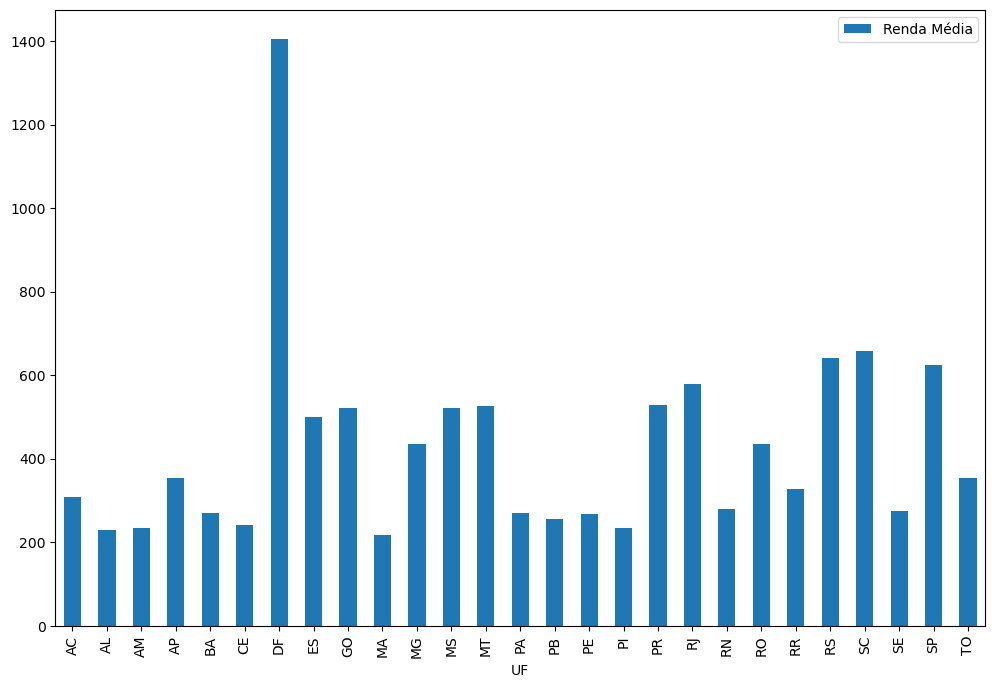

In [7]:
#kind=line,bar,barh,hist,box....
df_renda_media_por_uf.plot(kind='bar',x='UF',figsize=(12,8))
plt.show()

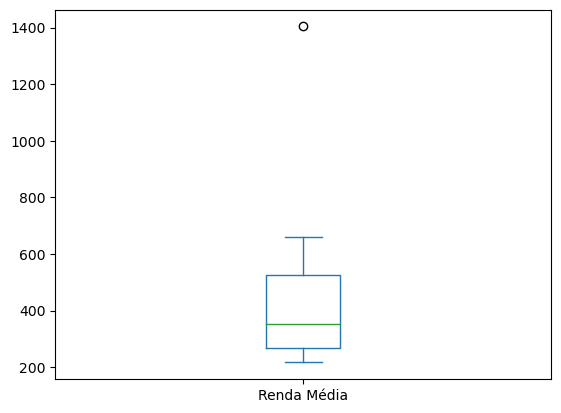

In [8]:
df_renda_media_por_uf.plot(kind='box',x='UF')
plt.show()

#### grafico de barras e boxplot com seaborn

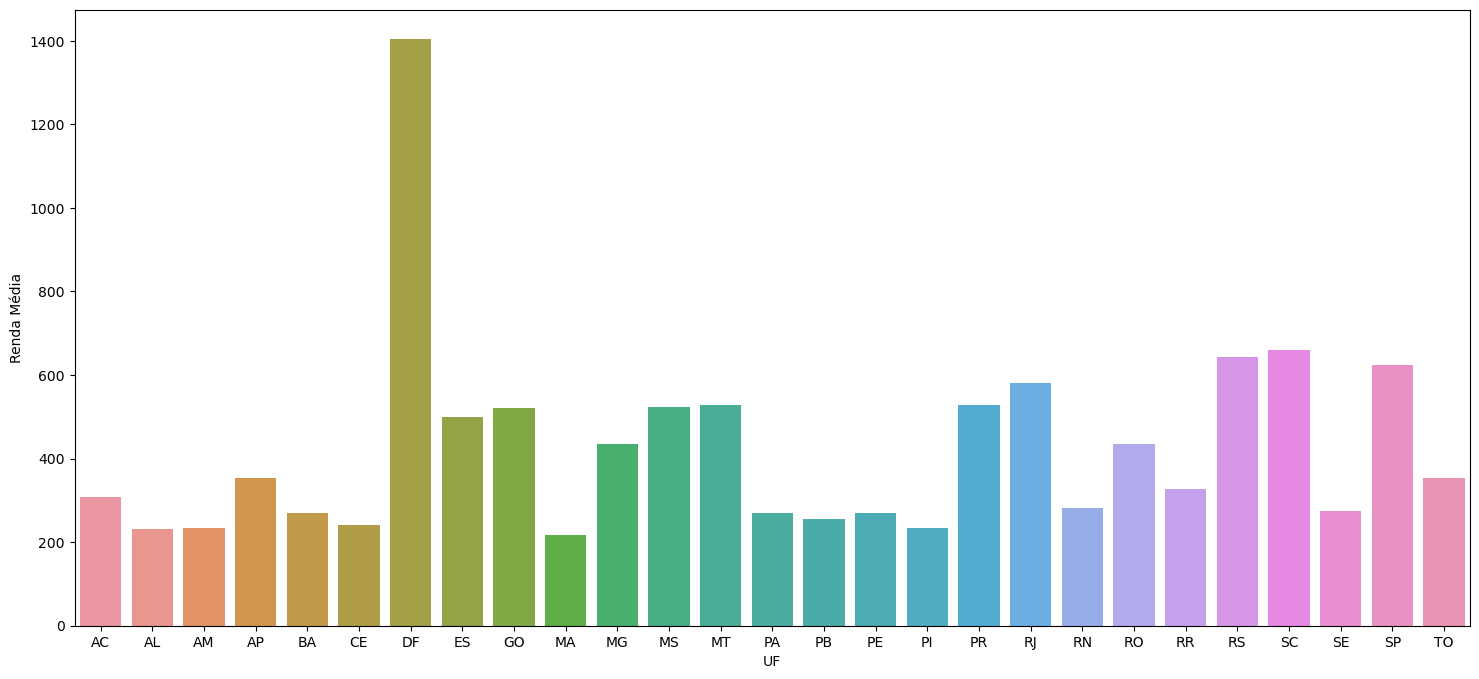

In [9]:
plt.figure(figsize=(18,8))
sns.barplot(x='UF',y='Renda Média',data=df_renda_media_por_uf)
plt.show()

#### boxplot com seaborn

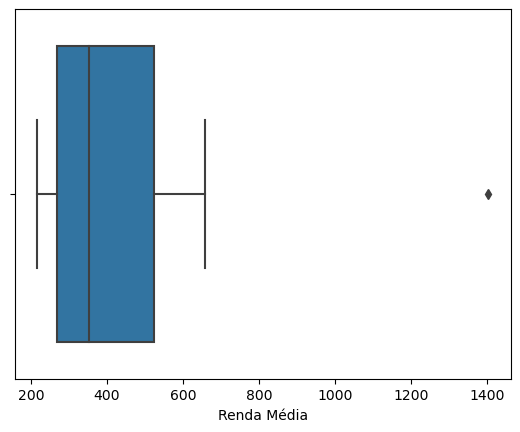

In [10]:
sns.boxplot(x='Renda Média',data=df_renda_media_por_uf)
plt.show()

#### plotando grafico da media com desvio padrao

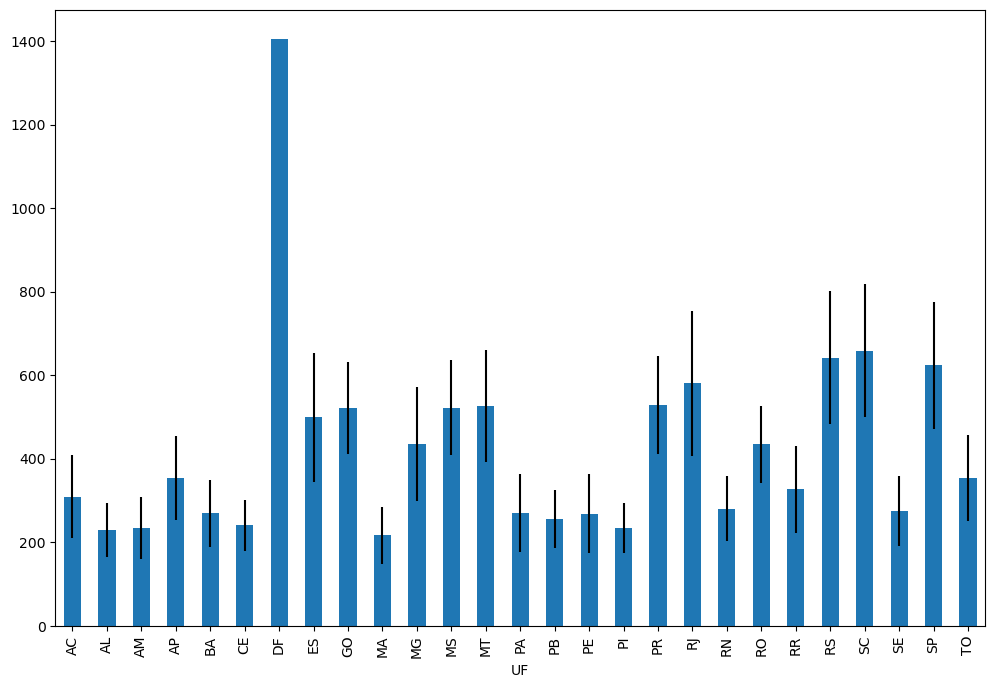

In [11]:
#renda media por estado
s_renda_media=df.groupby('UF')['renda'].mean()

#desvio padrao por estado
s_desvio_padrao=df.groupby('UF')['renda'].std(ddof=0)

#plota o grafico da media com desvio padrai oir estado
s_renda_media.plot(kind='bar',yerr=s_desvio_padrao,figsize=(12,8))
plt.show()

#### correlaçao

In [12]:
cursos={
        'Nome':['Curso 1:','Curso 2:','Curso 3:'],
        'Mensalidade':[22000,23000,25000],
        'Desconto':[1500,1200,1000]
}

df=pd.DataFrame(cursos)
display(df)

#calculando a correlaçao com pandas
r=df['Mensalidade'].corr(df['Desconto']) 
print(r)  #correlaçao muito forte negativa

,Nome,Mensalidade,Desconto
0,Curso 1:,22000,1500
1,Curso 2:,23000,1200
2,Curso 3:,25000,1000


-0.9538209664765319


In [13]:
df=pd.read_csv('https://softgraf.com/cursodatascience/dados-ibge-2010.csv')
df.head()

,id,cidade,UF,renda,analfabetismo
0,4200051,Abdon Batista,SC,450,9.73
1,1700251,Abreulândia,TO,436,13.38
2,3100401,Acaiaca,MG,324,13.94
3,4300034,Aceguá,RS,693,6.40
4,5200159,Adelândia,GO,464,14.65


In [14]:
#calcula o coeficiente da pearson
r=df['renda'].corr(df['analfabetismo'])
print(r)

-0.8288720611598431


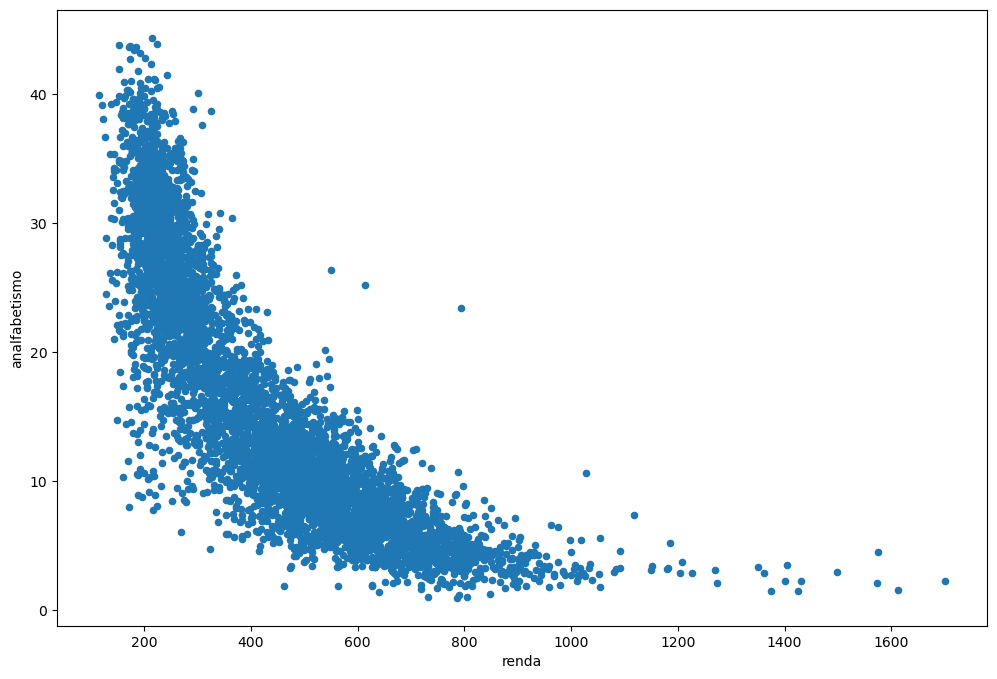

In [15]:
#construindo grafico para exibir a correlaçao
#grafico de dispersao com pandas
df.plot(kind='scatter',x='renda',y='analfabetismo',figsize=(12,8))
plt.show()

#### renomeando variaveis quantitativas

In [16]:
import numpy as np

#onde: 0='M' 1='F'

dfs=pd.DataFrame(
                {'Sexo':[0,1,0,1,0],
                 'Idade':[12,15,55,30,21]
                }
)
display(dfs)

df2=dfs.copy()
df3=dfs.copy()
#usando numpy where()
#troca todos os valores da coluna Sexo por caracteres
dfs.Sexo=np.where(dfs.Sexo==0,'M','F')
display(dfs)

#usando pandas.DataFrame.apply()

#define uma funçao python
def soma3(x):
    return x+3

#aplica a funçao soma3() para todos os valores da colina idade
df2['Idade']=df2['Idade'].apply(soma3)
display(df2)

#aplica a funçao soma3() para todos os valores da colina idade
df2['Idade']=df2['Idade'].apply(lambda x: x+3)
display(df2)

#idem anterior, porem usando map()
#map: usado apenas em series
#apply:pode ser usando em Series e DataFrames
df2['Idade']=df2['Idade'].map(lambda x: x+3)
display(df2)

#define outra funçao python
def trocar(x):
    #operador ternario
    return 'M' if x==0 else 'F'

#aplica a funçao trocar() por todos os valores da coluna Sexo
df2['Sexo']=df2['Sexo'].apply(trocar)
display(df2)

#define outra funçao python
def maioridade(x):
    #operador ternario
    return 'Maior' if x>=18 else 'Menor'

#aplica a funçao trocar() por todos os valores da coluna Sexo
dfs['Idade']=dfs['Idade'].apply(maioridade)
display(dfs)

#define uma funçao para tratar todos os dados do dataframe
def info(col):
    if col.name == 'Sexo':
            df_sexo=col.value_counts().to_frame()
            df_sexo.index=['M','F']
            display(df_sexo)
            return col
    elif col.name=='Idade':
            df_idade=col.value_counts().to_frame()
            display(df_idade)
            return col
    else:
            return col
    
#aplica a funçao info() sobre as colunas Sexo e Idade
df3.apply(info)

,Sexo,Idade
0,0,12
1,1,15
2,0,55
3,1,30
4,0,21


,Sexo,Idade
0,M,12
1,F,15
2,M,55
3,F,30
4,M,21


,Sexo,Idade
0,0,15
1,1,18
2,0,58
3,1,33
4,0,24


,Sexo,Idade
0,0,18
1,1,21
2,0,61
3,1,36
4,0,27


,Sexo,Idade
0,0,21
1,1,24
2,0,64
3,1,39
4,0,30


,Sexo,Idade
0,M,21
1,F,24
2,M,64
3,F,39
4,M,30


,Sexo,Idade
0,M,Menor
1,F,Menor
2,M,Maior
3,F,Maior
4,M,Maior


,Sexo
M,3
F,2


,Idade
12,1
15,1
55,1
30,1
21,1


,Sexo,Idade
0,0,12
1,1,15
2,0,55
3,1,30
4,0,21


#### trabalhando com datas

In [17]:
import datetime as dt

In [21]:
agora=dt.datetime.now()
print(agora)
type(agora)

2023-02-11 08:51:18.791071


datetime.datetime

In [22]:
str_agora=str(agora)
print(agora)
type(str_agora)

2023-02-11 08:51:18.791071


str

In [27]:
#formata e retora uma string
print(agora.strftime('%D'))
print(agora.strftime('%A,%d %B %Y'))
print(agora.strftime('%a,%d %b %y'))

02/11/23
Saturday,11 February 2023
Sat,11 Feb 23


In [29]:
#convertendo formato objeto para data
import pandas as pd
df=pd.read_csv('https://softgraf.com/cursodatascience/datas.csv')
df.head()

,Date,Clicks,Impressions,CTR,Position
0,2021-06-23,224,4001,5.6%,13.36
1,2021-06-22,241,3951,6.1%,12.19
2,2021-06-21,226,4326,5.22%,13.81
3,2021-06-20,329,4670,7.04%,12.79
4,2021-06-19,121,2475,4.89%,15.61


In [31]:
print(df['Date'].dtype)

object


In [32]:
#converte para tipo datetime
df['Date']=pd.to_datetime(df['Date'])

In [33]:
print(df['Date'].dtype)

datetime64[ns]


### trabalhando com horas

In [38]:
import datetime as dt
agora=dt.datetime.now()

#parametros:weeks,days,hours,minuts,seconds,milliseconts,microseconts
depois=agora+dt.timedelta(hours=2)
print(depois.strftime('%H:%M:%S'))

11:10:52
